In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
seed = 17
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer, precision_score

# Comitês

In [43]:
import numpy as np # Numpy: biblioteca para manipular vetores e matrizes
import pandas as pd # Pandas: biblioteca para manipular tabelas
import scipy.stats as ss
from sklearn.metrics import confusion_matrix

#### Carregando dataset UPLINK

In [44]:
lista = ['V1_size','V2_size','V3_size','V4_size','V5_size','V6_size','V7_size','V8_size','V9_size','V1_interval','V2_interval','V3_interval','V4_interval','V5_interval','V6_interval','V7_interval','V8_interval','V9_interval','classe']

test = []
train = []

for i in range(4,7):
    test.append(pd.read_csv(f'./dataset/dataset{i}_teste.csv', sep = ',', names=lista)) 
    train.append(pd.read_csv(f'./dataset/dataset{i}_treino.csv', sep = ',', names=lista))
    print(f"Tamanho df teste {i}: ",len(test[-1]))
    print(f"Tamanho df treino {i} : ",len(train[-1]))

frames = train + test
df_train1 = pd.concat(frames)
 

Tamanho df teste 4:  1063
Tamanho df treino 4 :  10600
Tamanho df teste 5:  1351
Tamanho df treino 5 :  13513
Tamanho df teste 6:  7
Tamanho df treino 6 :  66


In [45]:
## TESTE DE SEPARAÇAO - APAGAR TUDO DPS
lista = ['V1_size','V2_size','V3_size','V4_size','V5_size','V6_size','V7_size','V8_size','V9_size','V1_interval','V2_interval','V3_interval','V4_interval','V5_interval','V6_interval','V7_interval','V8_interval','V9_interval','classe']

test = []
train = []

for i in range(4,7):
    test.append(pd.read_csv(f'./dataset/dataset{i}_teste.csv', sep = ',', names=lista)) 
    train.append(pd.read_csv(f'./dataset/dataset{i}_treino.csv', sep = ',', names=lista))
    print(f"Tamanho df teste {i}: ",len(test[-1]))
    print(f"Tamanho df treino {i} : ",len(train[-1]))

training_frame = train
df_train1 = pd.concat(training_frame)
testing_frame = test
df_test1 = pd.concat(testing_frame)


Tamanho df teste 4:  1063
Tamanho df treino 4 :  10600
Tamanho df teste 5:  1351
Tamanho df treino 5 :  13513
Tamanho df teste 6:  7
Tamanho df treino 6 :  66


In [46]:
print(df_train1.shape)


(24179, 19)


In [47]:
from sklearn.utils import shuffle

df_train1 = shuffle(df_train1, random_state=17)
df_train1

,V1_size,V2_size,V3_size,V4_size,V5_size,V6_size,V7_size,V8_size,V9_size,V1_interval,V2_interval,V3_interval,V4_interval,V5_interval,V6_interval,V7_interval,V8_interval,V9_interval,classe
3875,0.000266,0.000557,0.000134,0.000128,3.6357,12.1460,0.002609,0.000004,0.000614,87.84,36.183,62.0,0.000,0.665410,-1.5727,138,62,94.932,1
5678,0.008047,0.025189,0.001006,0.000214,3.9427,15.2420,0.152060,0.000218,0.026323,1308.20,332.240,1448.0,0.000,-2.081100,2.7906,1448,288,1349.400,0
4855,0.000172,0.000245,0.000135,0.000134,2.9102,8.1831,0.001160,0.000003,0.000298,87.37,37.336,62.0,0.000,0.790280,-1.3413,153,62,94.940,1
363,0.003337,0.006249,0.000243,0.000348,2.0229,6.2209,0.026625,0.000002,0.007056,820.00,665.420,1282.0,462.570,-0.154990,1.1107,1594,76,1053.900,1
5793,0.005490,0.007660,0.000854,0.001238,1.1497,2.7380,0.022366,0.000003,0.009393,116.16,53.200,88.0,17.791,1.013300,2.2346,224,76,127.650,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9529,0.141930,0.485080,0.000443,0.000480,4.6668,24.1230,3.461400,0.000094,0.503080,910.94,682.890,708.0,720.540,0.083532,-1.9281,1676,222,1136.400,0
406,0.000149,0.000158,0.000122,0.000122,1.9872,4.0584,0.000688,0.000003,0.000217,87.37,37.336,62.0,0.000,0.790280,-1.3413,153,62,94.940,1
3102,0.002927,0.007105,0.000083,0.000111,2.7928,9.5531,0.029771,0.000008,0.007651,899.05,649.270,1338.0,266.870,-0.422600,1.2539,1590,76,1107.100,1
2191,0.001376,0.012914,0.000097,0.000133,9.7012,93.0490,0.129220,0.000000,0.012923,96.70,34.602,68.0,0.000,0.360500,-1.8886,138,68,102.650,1


In [48]:
import seaborn as sns
df_train1.classe.value_counts(normalize=True).round(3)

1    0.533
0    0.467
Name: classe, dtype: float64

In [49]:
df_train_noduplicates = df_train1.drop_duplicates()
df_test_noduplicates = df_test1.drop_duplicates()

In [50]:
print(f'Resultante com duplicados {df_train1.shape}')
print(f'Resultante sem duplicados {df_train_noduplicates.shape}')
print(f'Total de valores duplicados: {df_train_noduplicates.shape[0]-df_train1.shape[0]}')

Resultante com duplicados (24179, 19)
Resultante sem duplicados (21353, 19)
Total de valores duplicados: -2826


In [51]:
y= df_train_noduplicates.classe.to_numpy()
y_validation= df_test_noduplicates.classe.to_numpy()

In [60]:
from collections import Counter
print(Counter(y))
X_nodupl = df_train_noduplicates
X_nodupl = X_nodupl.drop(['classe'], axis=1)



print(Counter(y_validation))
df_validation = df_test_noduplicates.drop(['classe'], axis=1)
X_validation = df_validation


Counter({1: 12892, 0: 8461})
Counter({1: 1279, 0: 1111})


### Balanceando

In [61]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_balanced, y_balanced = undersample.fit_resample(X_nodupl, y)
from collections import Counter
print(Counter(y_balanced))

Counter({0: 8461, 1: 8461})


### Normalizando por padronização



In [62]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
Xstd = scaler.fit_transform(X_balanced)
df_balanced_stand = pd.DataFrame(Xstd, columns=X_balanced.columns, index=X_balanced.index)

In [63]:
Xstd_validation = scaler.fit_transform(X_validation)
df_validation = pd.DataFrame(Xstd_validation, columns=X_validation.columns, index=X_validation.index)

### Retirando as features 


### Com heuristica

In [64]:
# training dataset
df_features_selected = pd.DataFrame(df_balanced_stand, columns=X_balanced.columns, index=X_balanced.index)
# 
df_features_selected = df_features_selected.drop(['V2_size','V3_size','V6_size','V7_size','V8_size','V2_interval','V4_interval','V5_interval','V8_interval'], axis=1)
# validation dataset 
df_validation = df_validation.drop(['V2_size','V3_size','V6_size','V7_size','V8_size','V2_interval','V4_interval','V5_interval','V8_interval'], axis=1)

In [65]:
df_features_selected

,V1_size,V4_size,V5_size,V9_size,V1_interval,V3_interval,V6_interval,V7_interval,V9_interval
0,-0.062499,-0.113497,-0.053322,-0.041256,1.054716,0.869648,-0.150315,0.468175,0.891581
1,-0.065292,-0.116462,0.697672,-0.042304,1.334818,0.912304,2.727358,0.511336,1.096597
2,-0.064683,-0.096253,-0.813102,-0.042368,1.144396,0.912304,0.012891,0.511336,0.988799
3,-0.057342,0.049042,-0.696810,-0.040976,-1.002958,-0.958458,0.951805,-1.375406,-1.117089
4,-0.058819,-0.114059,1.013257,-0.038359,-0.757543,-0.988926,-0.334804,-0.217772,-0.721191
...,...,...,...,...,...,...,...,...,...
16917,-0.066342,-0.117695,-1.058356,-0.042716,-1.262504,-1.126034,-0.433809,-1.551131,-1.351344
16918,-0.065303,-0.110468,-0.690673,-0.042415,0.076455,-0.659867,-0.266824,0.717891,0.399286
16919,-0.066367,-0.117757,0.428665,-0.042710,-1.275684,-1.126034,-0.473700,-1.528010,-1.363108
16920,-0.066241,-0.114730,-0.809084,-0.042686,-1.296434,-1.241814,-0.477287,-1.551131,-1.379834


In [66]:
#from sklearn.decomposition import PCA

#pca = PCA(n_components= 5 )
#df_features_selected = pca.fit_transform(df_balanced_stand)
#print(pca)
#print(pca.explained_variance_ratio_)
#print(pca.singular_values_)


In [67]:
# training dataset
X = df_features_selected
y = y_balanced
print(f'X:{X.shape} y:{y.shape} ')
#validation dataset
X_validation = df_validation
y_validation = y_validation
print(f'X_val:{X_validation.shape} y_val:{y_validation.shape} ')


X:(16922, 9) y:(16922,) 
X_val:(2390, 9) y_val:(2390,) 


In [68]:
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10)

print(f'X_train:{X_train.shape} y_train:{y_train.shape} ')
print(Counter(y_train))
print(f'X_test:{X_test.shape} y_test:{y_test.shape} ')
print(Counter(y_test))

X_train:(8461, 9) y_train:(8461,) 
Counter({1: 4258, 0: 4203})
X_test:(8461, 9) y_test:(8461,) 
Counter({0: 4258, 1: 4203})


### Testing with knn 



In [71]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

knn3 = KNeighborsClassifier(n_neighbors=3) 

print('Fitting data')
knn3.fit(X_train, y_train)
print('Predicting data')
ypredicted = knn3.predict(X_test)
print(np.count_nonzero(y_test == ypredicted), f"out of {ypredicted.shape}")


Fitting data
Predicting data
8435 out of (8461,)


In [72]:
print(f' KNN: acuracia: {accuracy_score(ypredicted, y_test)}  Precisão :{precision_score(ypredicted, y_test)}')

 KNN: acuracia: 0.9969270771776386  Precisão :0.9971448965024983


In [73]:
confusion_matrix(y_test, ypredicted)

array([[4244,   14],
       [  12, 4191]])

In [74]:
ypredicted_validation = knn3.predict(X_validation)

In [75]:
print(f' KNN: acuracia: {accuracy_score(ypredicted_validation, y_validation)}  Precisão :{precision_score(ypredicted_validation, y_validation)}')

 KNN: acuracia: 0.9953974895397489  Precisão :0.9937451133698202


In [76]:
confusion_matrix(y_validation, ypredicted_validation)

array([[1108,    3],
       [   8, 1271]])

## Semente aleatória para reproducibilidade dos experimentos (reproducão dos experimentos)
seed = 17

In [77]:
scorer = make_scorer(precision_score) # Teste outras

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

gscv = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

algorithms = {
    'NeuNet': GridSearchCV(
        Pipeline([(
            'nn', MLPClassifier( solver='adam', early_stopping=True, random_state=seed ))]), 
        param_grid={
            'nn__activation': ['relu', 'tanh'],
            'nn__hidden_layer_sizes': [(10, 2), (20, 2), (30, 2)],
            'nn__validation_fraction': [0.1, 0.5, 0.6],
        },
        scoring=scorer,
        cv=gscv),
    
    'tree':  GridSearchCV(
        Pipeline([
            #('imputer', SimpleImputer(strategy='mean')),
            ('tree', DecisionTreeClassifier(random_state=seed))]), 
        param_grid={
            'tree__max_depth': [2, 4, 5],
            'tree__criterion': ['entropy', 'gini'],
        },
        scoring=scorer,
        cv=gscv),
    
    'bigtree':  GridSearchCV(
        Pipeline([
            #('imputer', SimpleImputer(strategy='mean')),
            ('tree', DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=seed))]), 
        param_grid={
            'tree__criterion': ['entropy', 'gini'],
        },
        scoring=scorer,
        cv=gscv),
    'kNN':  GridSearchCV(
        Pipeline([
            #('imputer', SimpleImputer(strategy='mean')),
            #('scaler', MinMaxScaler(feature_range=(0, 1))),
            ('selector', VarianceThreshold()),
            ('knn', KNeighborsClassifier())]), 
        param_grid={
            'selector__threshold': [0, 0.01, 0.02, 0.03],
            'knn__n_neighbors': [1, 3, 5],
            'knn__p': [1, 2],
        },
        scoring=scorer,
        cv=gscv),
    'nb': GridSearchCV(
        Pipeline([
            #('imputer', SimpleImputer(strategy='mean')),
            ('selector', SelectKBest()),
            ('nb', GaussianNB())]), 
        param_grid={
            'selector__k': [3, 5, 10],
        },
        scoring=scorer,
        cv=gscv),
    'svmlinear': GridSearchCV(
        Pipeline([
            #('imputer', SimpleImputer(strategy='mean')),
            #('scaler', StandardScaler()),
            ('pca', PCA()),
            ('svm', SVC(kernel='linear', random_state=seed))]), 
        param_grid={
            'pca__n_components': [2, 5, 10],
            'svm__C': [1.0, 2.0],
        },
        scoring=scorer,
        cv=gscv),
    'svmrbf': GridSearchCV(
        Pipeline([
            #('imputer', SimpleImputer(strategy='mean')),
            #('scaler', StandardScaler()),
            ('pca', PCA(random_state=seed)),
            ('svm', SVC(kernel='rbf', random_state=seed))]), 
        param_grid={
            'pca__n_components': [2, 5, 10],
            'svm__C': [1.0, 2.0],
            'svm__gamma': [0.1, 1.0, 2.0],
        },
        scoring=scorer,
        cv=gscv),

    
}

In [78]:
import time

In [79]:
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
# df_balanced_stand, y_balanced 
result = {}
result_score = {}
i = 1
# X_train, X_test, y_train, y_test

for alg, clf in algorithms.items():
    start = time.time()
    print(f'Train with algorithm {i}: {alg}')
    i += 1
    result[alg] = cross_val_predict(clf, X_train, y_train, n_jobs= -1,  cv=gscv)
    #result_score[alg] = cross_val_score(clf, X, y)
    print(f'acuracia:{accuracy_score(y_train,result[alg]) } ')
    print(result[alg])
    print(f"it took {time.time() - start} seconds.")

Train with algorithm 1: NeuNet
acuracia:0.9955088051057794 
[0 1 1 ... 1 0 0]
it took 107.07531785964966 seconds.
Train with algorithm 2: tree
acuracia:0.9984635385888193 
[0 1 1 ... 1 0 0]
it took 3.2786879539489746 seconds.
Train with algorithm 3: bigtree
acuracia:0.9986999172674624 
[0 1 1 ... 1 0 0]
it took 0.39666104316711426 seconds.
Train with algorithm 4: kNN
acuracia:0.9975180238742466 
[0 1 1 ... 1 0 0]
it took 13.663109064102173 seconds.
Train with algorithm 5: nb
acuracia:0.6914076350313202 
[1 0 0 ... 1 1 0]
it took 0.42445993423461914 seconds.
Train with algorithm 6: svmlinear
acuracia:0.7253279754166174 
[1 0 0 ... 0 0 0]
it took 18.32168698310852 seconds.
Train with algorithm 7: svmrbf
acuracia:0.9832171138163338 
[0 1 1 ... 1 0 0]
it took 35.76399207115173 seconds.


In [80]:
for alg, clf in algorithms.items():
    print(f'{alg}:  precision:{precision_score(y_train,result[alg])}, accuracy_score: {accuracy_score(y_train,result[alg])}  ')

NeuNet:  precision:0.9936827328029949, accuracy_score: 0.9955088051057794  
tree:  precision:0.9983564216952336, accuracy_score: 0.9984635385888193  
bigtree:  precision:0.9985912185959145, accuracy_score: 0.9986999172674624  
kNN:  precision:0.9957875029253452, accuracy_score: 0.9975180238742466  
nb:  precision:0.7369784172661871, accuracy_score: 0.6914076350313202  
svmlinear:  precision:0.8027551659361303, accuracy_score: 0.7253279754166174  
svmrbf:  precision:0.9842352941176471, accuracy_score: 0.9832171138163338  


In [81]:
result = pd.DataFrame.from_dict(result)

result

,NeuNet,tree,bigtree,kNN,nb,svmlinear,svmrbf
0,0,0,0,0,1,1,0
1,1,1,1,1,0,0,1
2,1,1,1,1,0,0,1
3,1,1,1,1,1,1,1
4,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...
8456,0,0,0,0,0,0,0
8457,1,1,1,1,1,1,1
8458,1,1,1,1,1,0,1
8459,0,0,0,0,1,0,0


In [82]:
for alg, clf in algorithms.items():
    print(clf)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=17, shuffle=True),
             estimator=Pipeline(steps=[('nn',
                                        MLPClassifier(early_stopping=True,
                                                      random_state=17))]),
             param_grid={'nn__activation': ['relu', 'tanh'],
                         'nn__hidden_layer_sizes': [(10, 2), (20, 2), (30, 2)],
                         'nn__validation_fraction': [0.1, 0.5, 0.6]},
             scoring=make_scorer(precision_score))
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=17, shuffle=True),
             estimator=Pipeline(steps=[('tree',
                                        DecisionTreeClassifier(random_state=17))]),
             param_grid={'tree__criterion': ['entropy', 'gini'],
                         'tree__max_depth': [2, 4, 5]},
             scoring=make_scorer(precision_score))
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=17, shuffle=True),
          

In [83]:
def phi(a, b, expected):
    errors = np.logical_or(a != expected, b != expected)
    
    return np.count_nonzero(np.logical_and(a == b, errors)) / np.count_nonzero(errors)


# X_balanced, y_balanced
correrrors = np.ones((len(algorithms), len(algorithms)))

for i in range(len(algorithms)):
    for j in range(i + 1, len(algorithms)):
        correrrors[i, j] = phi(result[result.columns[i]], result[result.columns[j]], y_train)
        correrrors[j, i] = correrrors[i, j]    
        
print(correrrors)

[[1.00000000e+00 6.25000000e-02 4.25531915e-02 9.25925926e-02
  1.02974828e-02 1.15631692e-02 5.88235294e-02]
 [6.25000000e-02 1.00000000e+00 7.14285714e-01 1.33333333e-01
  1.90912562e-03 2.14408233e-03 2.64900662e-02]
 [4.25531915e-02 7.14285714e-01 1.00000000e+00 1.42857143e-01
  1.91058464e-03 2.57621297e-03 2.68456376e-02]
 [9.25925926e-02 1.33333333e-01 1.42857143e-01 1.00000000e+00
  7.60456274e-04 2.56519880e-03 4.48717949e-02]
 [1.02974828e-02 1.90912562e-03 1.91058464e-03 7.60456274e-04
  1.00000000e+00 5.54820416e-01 2.60901975e-02]
 [1.15631692e-02 2.14408233e-03 2.57621297e-03 2.56519880e-03
  5.54820416e-01 1.00000000e+00 2.87859825e-02]
 [5.88235294e-02 2.64900662e-02 2.68456376e-02 4.48717949e-02
  2.60901975e-02 2.87859825e-02 1.00000000e+00]]


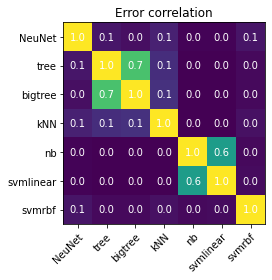

In [84]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
im = ax.imshow(correrrors)

ax.set_xticks(np.arange(len(result.columns)))
ax.set_yticks(np.arange(len(result.columns)))
ax.set_xticklabels(result.columns)
ax.set_yticklabels(result.columns)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(result.columns)):
    for j in range(len(result.columns)):
        text = ax.text(j, i, round(correrrors[i, j], 1),
                       ha="center", va="center", color="w")

ax.set_title("Error correlation")
fig.tight_layout()
plt.show()

## Todos são melhores que a média?

In [ ]:
# random classifier
mode = lambda x: ss.mode(x).mode[0]
random = np.mean(mode(y) == y)
print(random)

In [ ]:
result.apply(lambda ypred: np.mean(ypred == y))

## Combinando classificadores

In [ ]:
result['kNN+tree+svmrbf'] = result.filter(['kNN', 'tree', 'svmrbf']).apply(mode, axis=1)
result['nb+svmlinear+svmrbf'] = result.filter(['nb', 'svmlinear', 'svmrbf']).apply(mode, axis=1)
result['kNN+bigtree+svmrbf'] = result.filter(['kNN', 'bigtree', 'svmrbf']).apply(mode, axis=1)

In [ ]:
result.apply(lambda ypred: np.mean(ypred == y_balanced))

**nota**: podem existir outros casos de melhoras/pioras.

# Bagging, boosting, etc

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

In [ ]:
algorithms = {
    'bagging':  
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('tree', BaggingClassifier(random_state=seed))]),
    'forest':  
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('tree', RandomForestClassifier(random_state=seed))]),
    #'kNN+tree+svmrbf':
    #    VotingClassifier([ ])
    # Testar outros
}

In [ ]:
from sklearn.model_selection import cross_val_predict

for alg, clf in algorithms.items():
  result[alg] = cross_val_predict(clf, X_train, y_train, cv=cv)

In [ ]:
result.apply(lambda ypred: np.mean(ypred == y_train))

### Rede neural
X_train, X_test, y_train, y_test
X_balanced_both, y_balanced_both

In [85]:
from sklearn.neural_network import MLPClassifier

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
model_NN = MLPClassifier(hidden_layer_sizes=(20, 2),
                      activation='relu',
                      solver='adam',
                      max_iter=200,
                      random_state=15,
                      early_stopping=True,
                      #verbose= True,
                      validation_fraction=0.1)

In [88]:
model_NN.fit(X_train, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(20, 2), random_state=15)

In [89]:
from sklearn.metrics import accuracy_score, mean_absolute_error

In [90]:
ypredicted = model_NN.predict(X_test)

In [91]:
from sklearn.metrics import f1_score
print(f1_score(ypredicted, y_test))

0.9980975029726517


In [92]:
print(accuracy_score(ypredicted, y_test))

0.9981089705708545


In [93]:
confusion_matrix(y_test, ypredicted)

array([[4248,   10],
       [   6, 4197]])

In [94]:
tn, fp, fn, tp =  confusion_matrix(y_test, ypredicted).ravel()
(tn, fp, fn, tp)

(4248, 10, 6, 4197)

In [95]:
precision = (tp)/(tp+fp)
precision

0.9976230092702638

In [96]:
revocacao = tp/(tp+fn)
revocacao

0.9985724482512491

In [97]:
especificidade = tn/(tn+fp)
especificidade

0.9976514795678723

In [98]:
ypredicted_validation = model_NN.predict(X_validation)

In [99]:
confusion_matrix(y_validation, ypredicted_validation)

array([[1111,    0],
       [   5, 1274]])

In [100]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn import metrics

gscv = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
gscv

StratifiedKFold(n_splits=3, random_state=17, shuffle=True)

In [101]:
scores = cross_validate(model_NN, X, y, n_jobs=-1, cv = 3, scoring='f1')

In [102]:
scores

{'fit_time': array([3.49623108, 4.01251507, 3.43602014]),
 'score_time': array([0.01055789, 0.00618076, 0.01037693]),
 'test_score': array([0.9978746 , 0.99858206, 0.99646268])}

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [103]:
print("%0.4f precision with a standard deviation of %0.4f" % (scores['test_score'].mean(), scores['test_score'].std()))

0.9976 precision with a standard deviation of 0.0009


In [ ]:
scores = cross_validate(model_NN, X, y, n_jobs=-1, cv = 30, scoring='precision_macro')

In [105]:
scores

{'fit_time': array([3.49623108, 4.01251507, 3.43602014]),
 'score_time': array([0.01055789, 0.00618076, 0.01037693]),
 'test_score': array([0.9978746 , 0.99858206, 0.99646268])}

In [ ]:
print("%0.4f precision with a standard deviation of %0.4f" % (scores['test_score'].mean(), scores['test_score'].std()))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.6, random_state=0)
scores = cross_validate(model_NN, X, y, cv=cv,scoring='precision',return_estimator=True)
scores


## Decision Tree

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt = DecisionTreeClassifier(random_state=0, max_depth = 2)
decision_score = cross_val_score(dt, X, y, cv=10)

In [107]:
decision_score

array([0.82988777, 0.84347312, 0.8356974 , 0.8463357 , 0.83865248,
       0.95390071, 0.83333333, 0.82624113, 0.8356974 , 0.8321513 ])

In [108]:
d_tree = dt.fit(X_train,y_train)

In [109]:
y_hat = d_tree.predict(X_test)

In [110]:
accuracy_score(y_hat,y_test)

0.957570027183548

In [111]:
confusion_matrix(y_test, y_hat)

array([[3963,  295],
       [  64, 4139]])

[Text(334.8, 543.6, 'X[3] <= -0.042\ngini = 0.5\nsamples = 8461\nvalue = [4203, 4258]'),
 Text(167.4, 326.16, 'X[4] <= 0.706\ngini = 0.415\nsamples = 5803\nvalue = [1708, 4095]'),
 Text(83.7, 108.72000000000003, 'gini = 0.127\nsamples = 4348\nvalue = [297, 4051]'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.059\nsamples = 1455\nvalue = [1411, 44]'),
 Text(502.20000000000005, 326.16, 'X[8] <= -1.283\ngini = 0.115\nsamples = 2658\nvalue = [2495, 163]'),
 Text(418.5, 108.72000000000003, 'gini = 0.0\nsamples = 139\nvalue = [0, 139]'),
 Text(585.9, 108.72000000000003, 'gini = 0.019\nsamples = 2519\nvalue = [2495, 24]')]

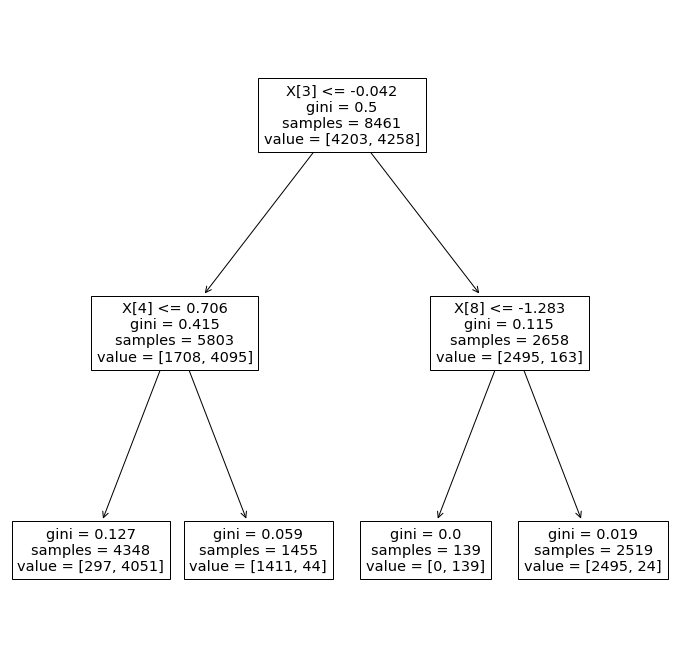

In [112]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(d_tree)  